**CAM(Class Activation Map)**은 모델이 이미지를 해당 클래스로 분류했을때 어느 부분을 중점적으로 봤는지 확인하게 해줬다. <br>
하지만 마지막 FC layer들을 GAP layer와 다음에 이어지는 한 개의 FC layer로 변경시켜 모델의 복잡도를 줄였다. <br>
즉, CAM은 원래 모델의 complexity를 줄이기 때문에 모델의 성능을 줄일 수 있다. <br>
또한 마지막 layer가 FC layer인 모델에 대해서만 적용이 가능하다.

이러한 단점을 보완하기 위해 **Grad-CAM**이 등장한다.

<h3> <strong> Grad-CAM Principle </strong> </h3>

CAM은 임의의 feature map의 중요도를 나타내는 weight를 feature map에 곱해 heatmap을 만들고 해당 heatmap들을 합해 하나의 heatmap을 만든다. <br>
Grad CAM은 이때 weight이 아닌 gradient($\alpha_k^c$)를 사용한다.

* gradient는 **분류된 class에 대한 feature map의 영향력을 의미**하기 때문에 weight대신 사용 가능하다.

임의의 클래스를 $y^c$, 마지막 Conv layer의 feature map을 $A^k$라고 하자. <br> 이때 feature map $A^k$의 영향력을 계산하기 위해 gradient를 계산한다. <br>

단, $A^k$의 모든 뉴런에 대한 gradient를 계산하고 모든 원소를 GAP(Global Average Pooling)하여 하나의 gradient($\alpha_k^c$)를 구한다.

> $α^c_k=\frac{1}{z}∑_i∑_j\, \frac{∂ \, y^c}{∂ \, A_{ij}^k}$

이후 importance weight(gradient)를 각 feature map에 곱해서 합하고, ReLU 함수에 통과시킨다. <br>
이때 ReLU 함수를 통과시키는 이유는 **'각 class에 대해 positive한 영향을 미치는 feature 들만 나타내기 위해서'**라고 한다.

이해를 돕기 위해 아래 사진을 가져왔다.

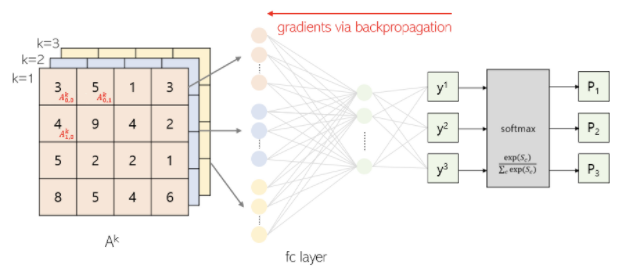

* [사진 출처]: https://hellopotatoworld.tistory.com/19





<h3> <strong> Guided Grad-CAM </strong> </h3>

Guided backpropagation visualization은 ReLU layer를 거쳐 backpropagation을 할 때, 음의 gradient를 없애며 시각화한다. <br>
이미지의 **세부적인 디테일을 하이라이트**하지만 각 class에 대한 차별적인 결과는 만들지 못한다. 

반면 Grad-CAM의 경우 각 class에 대한 차별적인 결과는 만들어주지만 세부적인 디테일은 잡아내지 못한다. <br>

위 두 방법의 장점을 합친 것이 **Guided Grad-CAM**이다. <br>
이 방법은 Guided backpropagation과 Grad-CAM을 element-wise 곱하여 시각화를 진행한다. 

> [참고] <br> 
> (1) Guided backpropagation, Deconvolution 기법들을 Pixel-space Gradient Visualization, CAM, Grad-CAM 기법들을 localization approach라고 부른다. <br>
> (2) Grad-CAM은 2차원 선형 보간법을 사용해 인풋 이미지와 같은 사이즈로 upscaling한다.

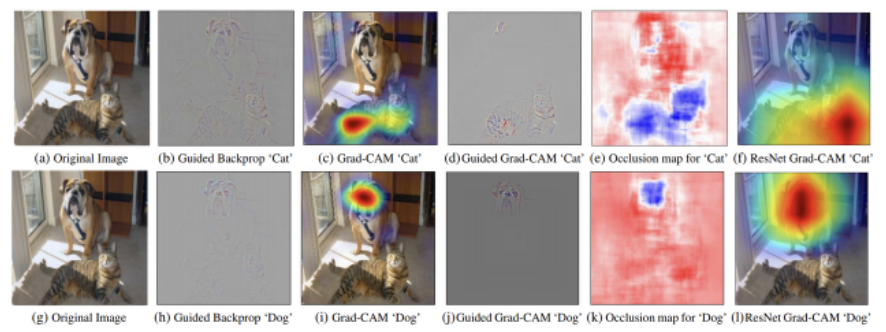